In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# 导入数据集
data = pd.read_csv('creditcard.csv')
data.head()

# v1 -  v28 也没有具体说这些列表达什么含义，对这些数据都做了一部分处理 
# 通过PC的降维操作，进行特征的压缩，相当于这些特征都是直接用的特征
# Amount 表示交易的金额
# Class 等于0，表示正样本， Clsss等于1 表示负样本

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


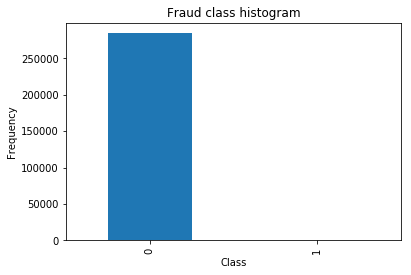

In [3]:
# 首先明确，我们拿到数据后，需要做什么事情？
# 这里是需要做欺诈检测这个事情，也就是说，我们知道数据里面，存在着正常的数据和异常的信息
# 也就是我们需要对信用卡交易信息，进行二分类问题，分成正常交易信息和异常交易信息
# 可能这里大部分数据都是正的样本，只有极少部分是负样本

# value_counts是为了查看这里有多少不重复的数据值的个数
count_classes = pd.value_counts(data['Class'], sort= True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Fraud class histogram')  # 欺诈类直方图
plt.xlabel('Class')
plt.ylabel('Frequency')
print(count_classes)

# 下图可以知道，  正样本大概有30W，负样本只有500
# 也就是它是一个样本极度不规则的数据，我们需要提出怎么解决方案呢？
# 需要用到  过采样  和 下采样
#
#  下采样：对于不均衡数据，我们采用下采样，就是把多的数据取出一部分，将它变成 两个样本数据相差差不多
#  过采样：对于较少的数据，我们采用生成虚拟数据，他们也是负样本，这样两个数据也类似了

#  综上： 下采样：就是让数据一样少，  过采样：就是让数据一样多

In [4]:
# 使用Scikit-learn数据预处理操作
from sklearn.preprocessing import StandardScaler 

# 因为Amonut数值的差异比较大，所以我们要保证 他们数值之间分布差异差不多
# 也就是要对他们做归一化处理 和 标准化操作
# fit_transform: 是数据做一个变换，  需要将data['Amount']数据，变成 -1,1之间， 最后做成一个新的特征
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
# 把Time，和原来的Amonut特征，都删除掉， axis表示删除一列
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
###### 下面我们采用下采样进行处理(也就是说，让正负样本数一样少) ###############

# 首先我们对数据进行切分，把数据变成特征数据和预测数据

# 把所有数据取出来，同时不包括 Class这个列, 这样就构成了特征数据
X = data.loc[:, data.columns != 'Class']

# 把Class这一列取出来， 这样就构成了label值
y = data.loc[:, data.columns == 'Class']

# 计算 Class = 1 的样本有多少个
number_records_fraud = len(data[data.Class == 1])
# 我们把这些样本都取出来，通过index来取数据
fraud_indices= np.array(data[data.Class ==1].index)


#### 我们需要在正样本中进行随机选择 ###

# 首先把等于0的索引都取值出来
normal_indices = data[data.Class == 0].index

# 使用numpy的 choise随机选择， 需要传入 选择数据，选择的个数， replace:表示是否代替
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace= False)
# 将选择出来的数据，变成np数组
random_normal_indices = np.array(random_normal_indices)

# 将 负样本数据 和 随机选择的正样本数据，进行合并操作
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

under_sample_data = data.iloc[under_sample_indices, :]

# 变成测试数据 和 标签数据
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']


In [6]:
####  交叉验证 #######

# 从train中选择出一部分作为训练集和测试集
from sklearn.cross_validation import train_test_split

# 对数据集进行切分   random_state：表示随机切分状态为0，以后每次随机的数都能复现
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("训练数据集长度", len(X_train))
print("测试数据集长度", len(X_test))
print("训练样本总数", len(X_train) + len(X_test))

# 对900多个采样数据集进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample,
                                                                                                    test_size=0.3, random_state = 0)
print("---")
print("下采样训练数据集长度", len(X_train_undersample))
print("下采样测试数据集长度", len(X_test_undersample))
print("下采样训练样本总数", len(X_train_undersample) + len(X_test_undersample))

# 我们以后需要使用原始的 85443个测试数据集，进行测试操作



训练数据集长度 199364
测试数据集长度 85443
训练样本总数 284807
---
下采样训练数据集长度 688
下采样测试数据集长度 296
下采样训练样本总数 984


E:\Software\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
#### 模型评估标准 ####
#  使用 Recall 召回率，查全率进行衡量   Recall = TP / (TP + FN)
#  在检测任务的时候，是使用Recal当成评估标准

from sklearn.linear_model import LogisticRegression
# 交叉验证评估标准
from sklearn.cross_validation import KFold, cross_val_score
# confusion_matrix 混淆矩阵
from sklearn.metrics import confusion_matrix, recall_score, classification_report

def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) #一第一个参数 训练集的长度，第二个参数为输入的几折交叉验证
 
    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]#传入选择正则化的参数
    
    # 可视化显示
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
 
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')#第一个for循环用来打印在每个正则化参数下的输出
 
        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):
 
             # 建立逻辑回归模型  C: 表示惩罚项力度   使用L1正则化惩罚项
            lr = LogisticRegression(C = c_param, penalty = 'l1')#传入正则化参数
 
            # 训练模型
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
 
            # 进行预测, 使用交叉验证中的验证集，进行预测
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
 
            # 使用 recall_score进行评分, 这里计算的是召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)
 
        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
 
    best_c = results_table.loc[results_table['Mean recall score'].astype(np.float64).idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


In [30]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9315068493150684
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.972972972972973
Iteration  5 : recall score =  0.9696969696969697

Mean recall score  0.9583970022326186

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9661016949152542
Iteration  4 : recall score =  0.9324324324324325
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.9009604576820737

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : rec

E:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.9090909090909091

Mean recall score  0.9128230199509512

-------------------------------------------
C parameter:  100
-------------------------------------------

Iteration  1 : recall score =  0.8904109589041096
Iteration  2 : recall score =  0.8493150684931506
Iteration  3 : recall score =  0.9661016949152542
Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.9090909090909091

Mean recall score  0.9121729154698739

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


In [35]:
# 混淆矩阵是由一个坐标系组成的， 其中X轴是预测值， Y轴是真实值
# 我们可以通过他查看到他的精度， 和 Recall值（召回率 ）
# 使用下采样数据集上，进行的测试操作
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Recall metric in the testing dataset:  0.9183673469387755


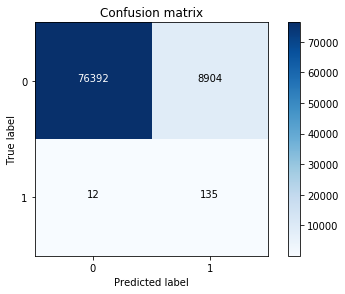

In [36]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the testing dataset:  0.9183673469387755


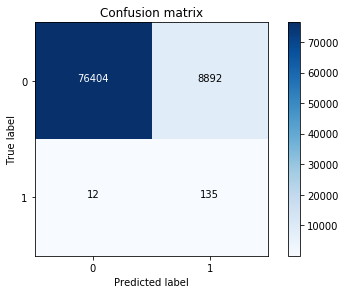

In [37]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9931972789115646
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.8775510204081632
Recall metric in the testing dataset:  0.8367346938775511
Recall metric in the testing dataset:  0.7482993197278912
Recall metric in the testing dataset:  0.5714285714285714


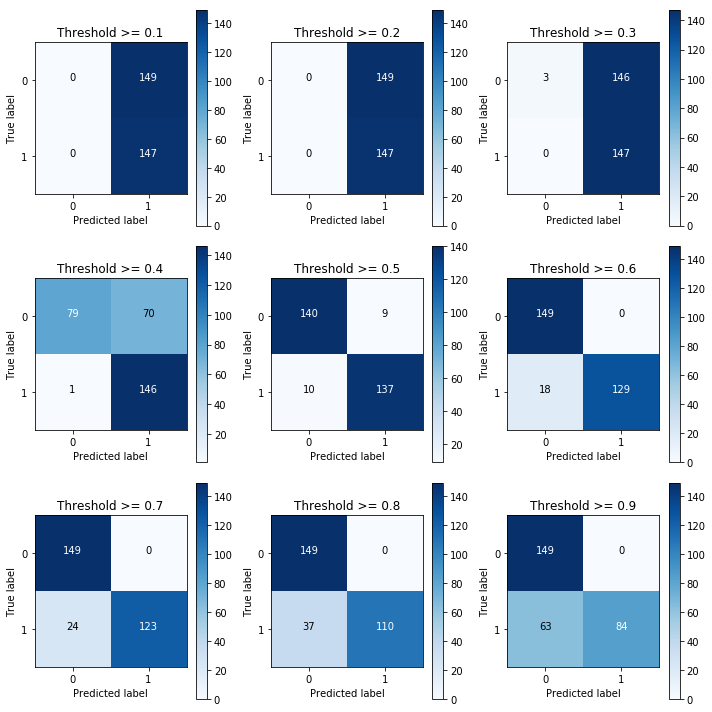

In [38]:
# 我们在做模型预测时，要基于业务层面去考虑，在此案例中我们我们把正常的样本预测成异常的出现8000多个，
# 显然是不合适的，看来下采样方法效果也不是很好，那么我们接下里来调整逻辑回归的阈值来看下阈值
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
# 使用 predict_proba 预测出概率值
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
 
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
 
# 指定画图域
plt.figure(figsize=(10,10))
 
j = 1
for i in thresholds:
    
    # 这里是和预测值进行比较，得到预测结果
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
 
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 


In [52]:
####  过采样操作  ####
# SMOTE
# 对于少数类的每个样本x, 以欧式距离为标准计算它到少数类样本集中所有样本的距离，得到其K近邻
# 根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每个少数类样本x,从其K近邻中随机选择若干个样本，假设选择的近邻为xn。
# 对于每个随机选出的近邻xn，分别与原来样本构建新的样本
# X1 = x + rand(0, 1)*(x2 - x)

import pandas as pd
from imblearn.over_sampling import SMOTE#引用过采样的smote方法
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn.utils._joblib'

In [55]:
credit_cards=pd.read_csv('creditcard.csv')
 
columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)
 
features=credit_cards[features_columns]
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

# 定义SMOTE模型，random_state相当于随机数种子的作用
oversampler=SMOTE(random_state=0)

# 将原始数据拿过来 ，自动生成负样本 
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

# 从上述代码中可以看出，SMOTE模型默认生成一比一的数据，如果想生成其他比例的数据，
# 可以使用radio参数。不仅可以处理二分类问题，同样适用于多分类问题

# imblearn中上采样接口提供了随机上采样RandomOverSampler，SMOTE，ADASYN三种方式，调用方式和主要参数基本一样。
# 下采样接口中也提供了多种方法，以RandomUnderSampler为例。

# 最后打印出负样本的数量，我们能够发现，正负样本数已经达到均衡效果
print(len(os_labels[os_labels==1]))

# 下面使用过采样的方式，查看得到的精度是多高
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

227454
-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9687285603629523
Iteration  4 : recall score =  0.9578923071850166
Iteration  5 : recall score =  0.958397907255361

Mean recall score  0.9340156395107508

-------------------------------------------
C parameter:  0.1
-------------------------------------------



E:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9696802036073918
Iteration  4 : recall score =  0.9599366900781482
Iteration  5 : recall score =  0.9582330376672052

Mean recall score  0.9345818708206339

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9702777470399468
Iteration  4 : recall score =  0.9588485507963201
Iteration  5 : recall score =  0.9607720293248041

Mean recall score  0.9349915499822992

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9702998782781896
Iteration  4 : recall score =  0.9591672986667545
Iteration

In [ ]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# 总结：对于样本不均衡的数据，我们能够利用的数据越多越好，也就是说一般采用过采样，效果会比较好
# 一般下采样的时候，误杀率会偏高